<a href="https://colab.research.google.com/github/DS3001/Group4/blob/main/Project_2_Data_Cleaning_Testing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Reading in the testing data
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("/content/testing_data.csv", index_col=0)

In [21]:
data.describe()
data.head

<bound method NDFrame.head of         id  gender   age  hypertension  heart_disease ever_married  \
251  30468    Male  58.0             1              0          Yes   
252  16523  Female   8.0             0              0           No   
253  56543  Female  70.0             0              0          Yes   
255  32257  Female  47.0             0              0          Yes   
259  28674  Female  74.0             1              0          Yes   
..     ...     ...   ...           ...            ...          ...   
228  39105    Male  74.0             0              0          Yes   
233  68356  Female  73.0             0              0          Yes   
237  28493    Male  57.0             0              0          Yes   
247  27153  Female  75.0             0              0          Yes   
248  34060    Male  71.0             1              0          Yes   

         work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
251        Private          Urban              87.

In [6]:
#looking at the unique values for each column
unique_values = {}
for column in data.columns:
    unique_values[column] = data[column].unique()
# Print the unique values for each column
for column, values in unique_values.items():
    print(f'Unique values for {column}: {values}')

Unique values for id: [30468 16523 56543 ... 28493 27153 34060]
Unique values for gender: ['Male' 'Female']
Unique values for age: [58.    8.   70.   47.   74.   79.   40.   35.   44.   71.   23.   69.
 21.   78.   24.   60.   66.   52.   34.   57.   41.   56.    0.88 25.
 39.   31.   61.   22.   42.   33.   68.   26.   43.   53.   55.   64.
 38.    5.   54.   72.   51.   20.   65.   16.   46.   67.   18.    1.08
  1.8  80.   37.    9.   28.   10.   82.    2.   32.   30.   45.   50.
  6.   73.   27.   63.   59.   29.   36.    1.   48.    1.4  19.    1.72
 77.   75.   15.   49.   14.   81.    1.64 13.   11.   62.   76.    4.
 12.    7.    1.48  0.24  0.64  0.48  3.    1.24 17.    1.16  0.56  0.72
  0.16  1.32  0.32]
Unique values for hypertension: [1 0]
Unique values for heart_disease: [0 1]
Unique values for ever_married: ['Yes' 'No']
Unique values for work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values for Residence_type: ['Urban' 'Rural']
Unique 

One hot encoding for categorical variables

In [7]:
#one hot encoding for the categorical variables (that don't already have 0s and 1s)
data = pd.get_dummies(data, columns=['gender'], prefix=['gender'])
data = pd.get_dummies(data, columns=['ever_married'], prefix=['ever_married'])
data = pd.get_dummies(data, columns=['work_type'], prefix=['work_type'])
data = pd.get_dummies(data, columns=['Residence_type'], prefix=['Residence_type'])
data = pd.get_dummies(data, columns=['smoking_status'], prefix=['smoking_status'])

In [8]:
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
251,30468,58.0,1,0,87.96,39.2,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
252,16523,8.0,0,0,110.89,17.6,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0
253,56543,70.0,0,0,69.04,35.9,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
255,32257,47.0,0,0,210.95,50.1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
259,28674,74.0,1,0,205.84,54.6,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


Handling outliers in the numeric variables.

<Axes: >

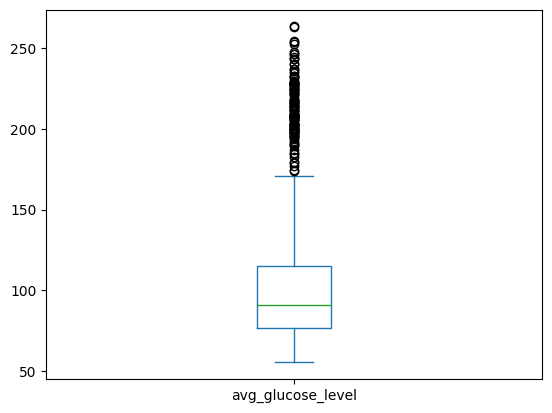

In [9]:
#check for outliers in the numeric variables
data["avg_glucose_level"].plot.box() #yes there are many outliers

<Axes: >

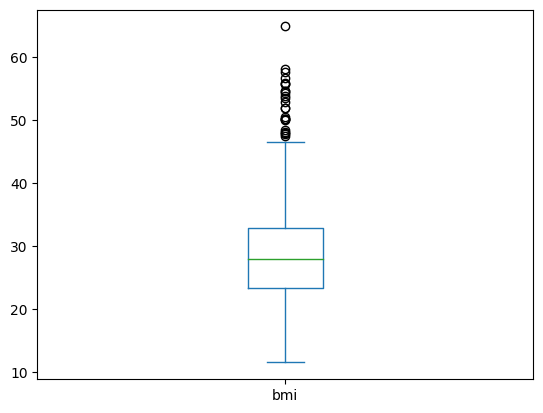

In [22]:
data["bmi"].plot.box() #htere are also many outliers for bmi

<Axes: >

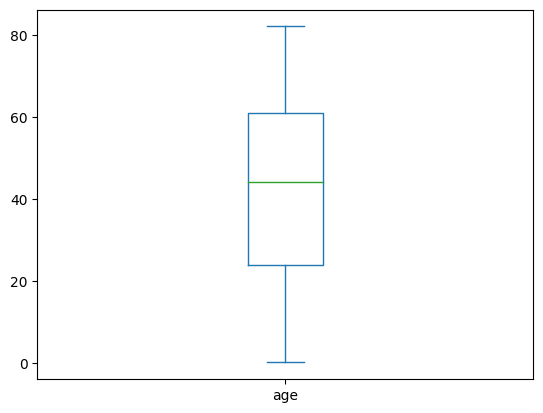

In [11]:

data["age"].plot.box() #there does not appear to be outliers for age variable

<ipython-input-12-217acff727e7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-12-217acff727e7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-12-217acff727e7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

<Axes: >

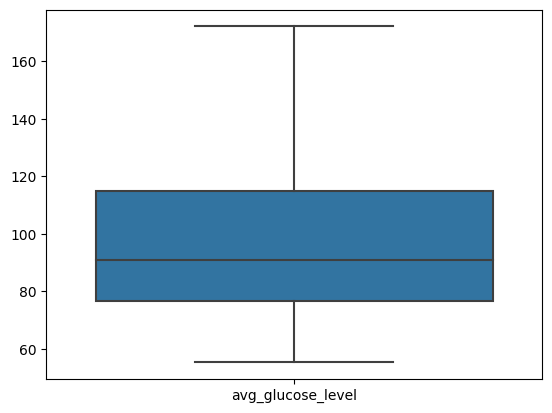

In [12]:
#windsorize the avg_glucose_level and bmi variables

## Function to compute whiskers:
import seaborn as sns
x = data[["avg_glucose_level"]]
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

sns.boxplot( windsorize(x))

<ipython-input-13-0a1747a27430>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-13-0a1747a27430>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-13-0a1747a27430>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

<Axes: >

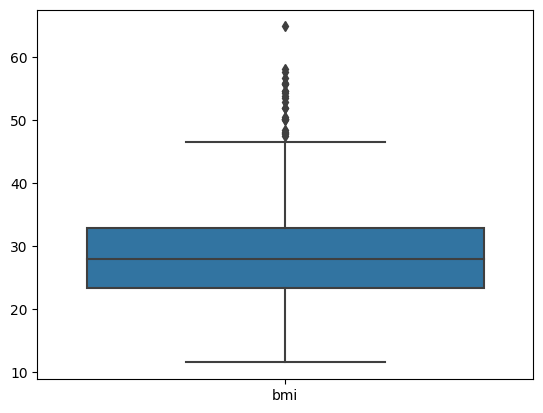

In [13]:
x = data[["bmi"]]
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

sns.boxplot( windsorize(x))

<Axes: >

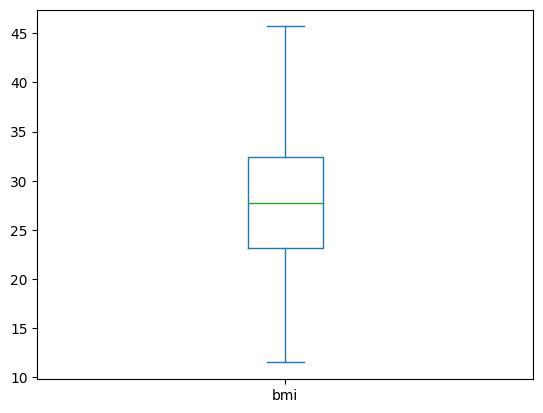

In [25]:
#windsorizing didn't get rid of outliers for 'bmi', so I dropped outliers 46 and above
data = data.loc[data['bmi']<46,:]
data["bmi"].plot.box()

Checking distributions of our numeric variables and if any are badly scaled (we should transform them).

<Axes: xlabel='age', ylabel='Count'>

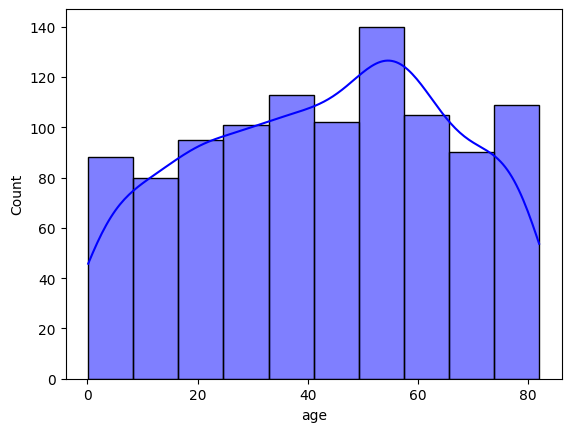

In [81]:
#Age histogram - appears approx. normal
sns.histplot(data["age"], bins=10, color='blue', kde=True)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

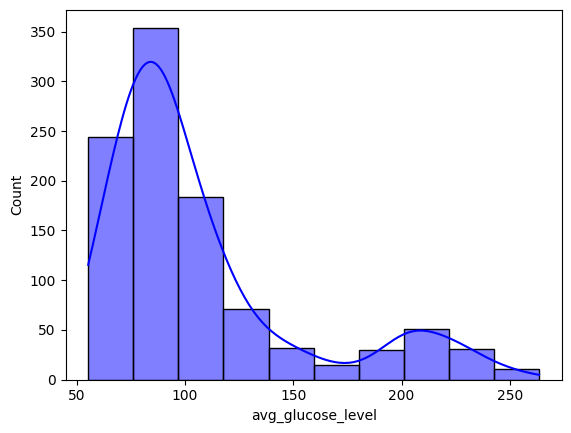

In [82]:
#average glucose level histogram - heavily skewed right, need to transform
sns.histplot(data["avg_glucose_level"], bins=10, color='blue', kde=True)

<Axes: xlabel='log_avg_glucose_level', ylabel='Count'>

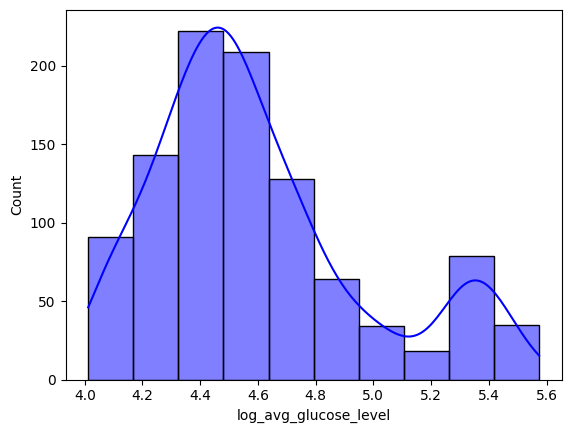

In [83]:
#log transform of avg_glucose_level variable
data['log_avg_glucose_level'] = np.log(data['avg_glucose_level'])
sns.histplot(data["log_avg_glucose_level"], bins=10, color='blue', kde=True)

#still a little skewed, but looks a lot better when log transformed

<Axes: xlabel='bmi', ylabel='Count'>

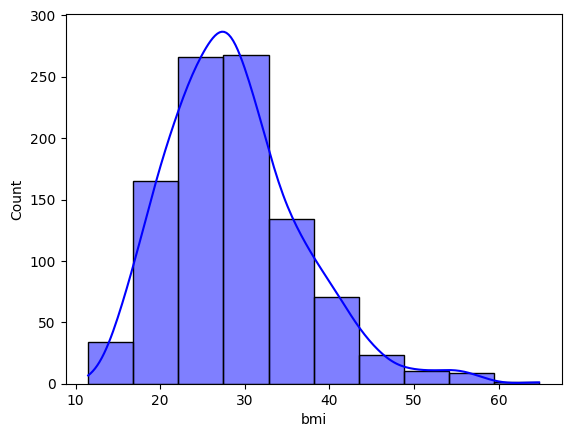

In [84]:
#bmi histogram - appears approx. normal
sns.histplot(data["bmi"], bins=10, color='blue', kde=True)

Checking for missing values.

In [85]:
#Check for any missing values
missing_values = data.isna()
# Count missing values in each column
missing_count = missing_values.sum()
print(missing_count)

Unnamed: 0                         0
id                                 0
age                                0
hypertension                       0
heart_disease                      0
avg_glucose_level                  0
bmi                               42
stroke                             0
gender_Female                      0
gender_Male                        0
ever_married_No                    0
ever_married_Yes                   0
work_type_Govt_job                 0
work_type_Never_worked             0
work_type_Private                  0
work_type_Self-employed            0
work_type_children                 0
Residence_type_Rural               0
Residence_type_Urban               0
smoking_status_Unknown             0
smoking_status_formerly smoked     0
smoking_status_never smoked        0
smoking_status_smokes              0
log_avg_glucose_level              0
dtype: int64


Handle the missing values in the 'bmi' column.

In [86]:
#based on best approach for handling missing data for linear models (model evaluation notes)

# Step 1: Create a missing dummy variable for 'bmi' column
data['bmi_NA'] = data['bmi'].isnull().astype(int)  # 1 if missing, 0 if not missing

# Step 2: Replace missing values in 'bmi' column with zeros
data['bmi'].fillna(0, inplace=True)
print(data)

      Unnamed: 0     id   age  hypertension  heart_disease  avg_glucose_level  \
0            251  30468  58.0             1              0              87.96   
1            252  16523   8.0             0              0             110.89   
2            253  56543  70.0             0              0              69.04   
3            255  32257  47.0             0              0             210.95   
4            259  28674  74.0             1              0             205.84   
...          ...    ...   ...           ...            ...                ...   
1018         228  39105  74.0             0              0              60.98   
1019         233  68356  73.0             0              0              70.94   
1020         237  28493  57.0             0              0              86.30   
1021         247  27153  75.0             0              0              78.80   
1022         248  34060  71.0             1              0              87.80   

       bmi  stroke  gender_

In [87]:
missing_values = data.isna()
# Count missing values in each column
missing_count = missing_values.sum()
print(missing_count)

#There are no missing values now

Unnamed: 0                        0
id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
log_avg_glucose_level             0
bmi_NA                            0
dtype: int64


**Challenges in reading, cleaning, and preparing the data for analysis**
- Deciding what to do with missing values - we decided to create a dummy na column for bmi and then also convert all of the missing values to 0. The dummy column makes it clear which bmi values are missing (1) and this approach was utilized since it is generally the best approach for linear models (according to the model_evaluation notes)
- When and how to transform badly scared variables
  - bmi had a very slightly right skewed histogram, however, it was close enough to approx. normal that we left it
  - average glucose level had a very skewed right histogram, and after attempting many log, sqrt, and arcsin transformations, we determined that the log transformation made the histogram appear the most normal.
- windsorizing worked well for average glucose level variable but for bmi, this still left some outliers, so I had to just drop values >=46 for bmi.

